### Introduction [(i.e)Business Problem]
                                       Starting a business is an intricate process of putting in monetary resources and materials to get a source of income. It can be any type of business, ranging from small retail outlets to shopping malls. Many factors influence the success or failure of the business. But one of the major factor is location of the business center. Since people want to spend minimum time and energy to get maximum products, location of the business plays a vital role in establishing a business (like a housing community can be a good place to open a groceries outlet).

                                       So, the purpose of this analysis is to analyze the preferable locations for the business in Toronto to chose the apt location by providing data about the income and population of each neighborhood as well as the existing competitions present in the same regions.

                                       The target population will be the aspiring entrepreneurs looking for a place to establish a successful business.

### Data to be Analyzed:
To provide the stakeholders the necessary information I'll be combining Toronto's 2016 Census that contains Population, Average income per Neighborhood with Foursquare API to collect competitors on the same neighborhoods. Toronto's Census data in publicly available at this website: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
Link='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df_Neighbourhoods = pd.read_csv(Link,encoding='latin1')
print('Data loaded')

Data loaded


In [3]:
df_Neighbourhoods.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

### Methodology

In [4]:
Neighbourhoods = list(df_Neighbourhoods.columns.values)
Neighbourhoods = Neighbourhoods[5:]
print(Neighbourhoods)

['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [51]:
df_Toronto = pd.DataFrame(index=Neighbourhoods, columns=["Population_2016","Income_2016"])
df_Toronto.head()

,Population_2016,Income_2016
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


In [52]:
for index, row in df_Toronto.iterrows():
    df_Toronto.at[index, 'Population_2016'] = df_Neighbourhoods[index][2]
    df_Toronto.at[index, 'Income_2016'] = df_Neighbourhoods[index][2264]
    

df_Toronto.sort_values('Income_2016')

,Population_2016,Income_2016
St.Andrew-Windfields,"17,812","100,516"
Edenbridge-Humber Valley,"15,535","101,551"
Lawrence Park North,"14,607","111,730"
Annex,"30,526","112,766"
Yonge-St.Clair,"12,528","114,174"
Bedford Park-Nortown,"23,236","123,077"
Leaside-Bennington,"16,828","125,564"
Kingsway South,"9,271","144,642"
Casa Loma,"10,968","165,047"
Lawrence Park South,"15,179","169,203"


In [15]:
import matplotlib.pyplot as plt

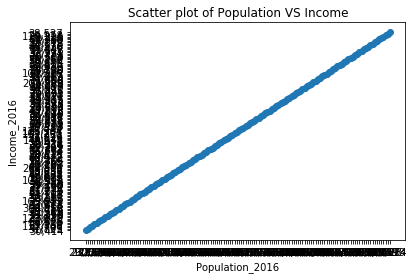

In [57]:
plt.scatter(df_Toronto['Population_2016'], df_Toronto['Income_2016'])
plt.title('Scatter plot of Population VS Income')
plt.xlabel('Population_2016')
plt.ylabel('Income_2016')
plt.show()

In [53]:
df_Toronto.sort_values('Population_2016')

,Population_2016,Income_2016
Runnymede-Bloor West Village,"10,070","71,888"
Long Branch,"10,084","47,384"
Maple Leaf,"10,111","37,108"
Thistletown-Beaumond Heights,"10,360","32,815"
Rexdale-Kipling,"10,529","34,418"
Markland Wood,"10,554","62,378"
Pelmo Park-Humberlea,"10,722","39,003"
Forest Hill South,"10,732","204,521"
Regent Park,"10,803","34,597"
Humber Heights-Westmount,"10,948","45,615"


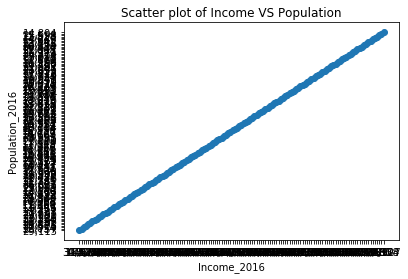

In [54]:
plt.scatter(df_Toronto['Income_2016'], df_Toronto['Population_2016'])
plt.title('Scatter plot of Income VS Population')
plt.xlabel('Income_2016')
plt.ylabel('Population_2016')
plt.show()

### Result

From the above analysis, we can see that Population and Income are positively correlated.

Thus, we can see that as the annual population of the neighbourhood increases the annual income of the neighbourhood also inceases. 

### Discussion

From the above scatter plot, we can see that the highly populated areas have high annual income in general.

### Conclusion

Thus, from the above analysis, we can conclude that neighbourhoods with higher population tends to generate more income than the neighbourhoods with lower population